# Cars Prices Exploratory Data Analysis (EDA) & Prediction

Welcome to the Cars Prices Exploratory Data Analysis and Prediction project!

In this analysis, we delve into a dataset containing information about various car models, exploring factors that influence their prices. Our goal is to gain insights into the dataset, identify patterns, and prepare the data for building predictive models.

!['Cars'](https://www.bhmpics.com/downloads/pc-car-wallpaper-4k-Wallpapers/36.6a08a2d39cd6fc563d8af395e4135be8.jpg)

## Dataset Overview

The dataset comprises details such as car body type, brand, model, color, and various numerical features like length, width, height, and price. Additionally, categorical features like transmission, fuel type, and gear box are included. The dataset offers a comprehensive view of the characteristics of different cars.

## Objectives

1. Explore the distribution of car prices and identify outliers.
2. Visualize the relationship between car body types and prices.
3. Analyze the distribution of fuel types and transmissions.
4. Build predictive models to estimate car prices.

Now, let's embark on this journey of exploration and uncover the fascinating insights hidden within the data!


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use("ggplot")
%matplotlib inline

In [ ]:
# Load the data
df = pd.read_csv("cars_prices_data.csv")

In [ ]:
# Display the first 10 rows
df.head(10)

,Body,Transmission,Fuel,Brand,Model,Price,Color,Length,Width,Height,Wheel Base,Gear Box,Seats,Cargo Volume,Max Torque At
0,hatchback,manual,cng,maruti,maruti wagon r,370000,silver,3599.0,1495.0,1700.0,2400.0,5 speed,5.0,180.0,3500.0
1,hatchback,manual,cng,maruti,maruti celerio,365000,grey,3600.0,1600.0,1560.0,2425.0,5 speed,5.0,235.0,3500.0
2,sedan,manual,cng,honda,honda amaze,421000,silver,3990.0,1680.0,1505.0,2405.0,5 speed,5.0,400.0,4500.0
3,hatchback,manual,cng,maruti,maruti wagon r,240000,silver,3595.0,1475.0,1700.0,2400.0,5 speed,5.0,400.0,3500.0
4,muv,manual,cng,maruti,maruti ertiga,1175000,white,4395.0,1735.0,1690.0,2740.0,5 speed,7.0,400.0,4200.0
5,hatchback,manual,cng,maruti,maruti wagon r,250000,white,3599.0,1495.0,1700.0,2400.0,5 speed,5.0,180.0,3500.0
6,hatchback,manual,cng,maruti,maruti alto,145000,blue,3495.0,1475.0,1460.0,2360.0,5 speed,5.0,180.0,3000.0
7,hatchback,manual,cng,hyundai,hyundai grand i10,465000,grey,3765.0,1660.0,1520.0,2425.0,5 speed,5.0,256.0,4000.0
8,hatchback,manual,cng,maruti,maruti wagon r,560000,silver,3655.0,1620.0,1675.0,2435.0,5 speed,5.0,341.0,3500.0
9,hatchback,manual,cng,maruti,maruti wagon r,215000,silver,3599.0,1495.0,1700.0,2400.0,5 speed,5.0,180.0,3500.0


In [ ]:
# Display the last 3 rows
df.tail(3)

,Body,Transmission,Fuel,Brand,Model,Price,Color,Length,Width,Height,Wheel Base,Gear Box,Seats,Cargo Volume,Max Torque At
34101,hatchback,manual,diesel,tata,tata altroz,735000,grey,3990.0,1755.0,1523.0,2501.0,5 speed,5.0,345.0,2125.0
34102,hatchback,manual,diesel,tata,tata indica ev2,225000,white,3690.0,1665.0,1485.0,2400.0,5 speed,5.0,220.0,2400.0
34103,sedan,manual,diesel,tata,tata tigor,530000,orange,3992.0,1677.0,1537.0,2450.0,5 speed,5.0,419.0,2400.0


## Some Numerical Information about the Data

In [ ]:
df.shape

(34104, 15)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34104 entries, 0 to 34103
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Body           34104 non-null  object 
 1   Transmission   34104 non-null  object 
 2   Fuel           34104 non-null  object 
 3   Brand          34104 non-null  object 
 4   Model          34104 non-null  object 
 5   Price          34104 non-null  int64  
 6   Color          34104 non-null  object 
 7   Length         34104 non-null  float64
 8   Width          34104 non-null  float64
 9   Height         34104 non-null  float64
 10  Wheel Base     34104 non-null  float64
 11  Gear Box       34104 non-null  object 
 12  Seats          34104 non-null  float64
 13  Cargo Volume   34104 non-null  float64
 14  Max Torque At  34104 non-null  float64
dtypes: float64(7), int64(1), object(7)
memory usage: 3.9+ MB


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,34104.0,819363.900627,3.195303e+06,11963.0,319000.0,535000.0,890000.0,550000555.0
Length,34104.0,4120.563893,4.036742e+02,2752.0,3795.0,3995.0,4440.0,5982.0
Width,34104.0,1727.399982,1.303943e+02,1312.0,1680.0,1722.0,1790.0,2236.0
Height,34104.0,1578.591221,1.162622e+02,1165.0,1495.0,1530.0,1643.0,2075.0
Wheel Base,34104.0,2549.004340,1.579668e+02,1840.0,2425.0,2520.0,2650.0,3772.0
Seats,34104.0,5.243696,7.358842e-01,0.0,5.0,5.0,5.0,14.0
Cargo Volume,34104.0,360.991262,1.317169e+02,20.0,256.0,350.0,465.0,2055.0
Max Torque At,34104.0,3176.838098,1.027281e+03,160.0,2125.0,3400.0,4000.0,21800.0


In [ ]:
df.isnull().sum()

Body             0
Transmission     0
Fuel             0
Brand            0
Model            0
Price            0
Color            0
Length           0
Width            0
Height           0
Wheel Base       0
Gear Box         0
Seats            0
Cargo Volume     0
Max Torque At    0
dtype: int64

In [ ]:
df.nunique()

Body               11
Transmission        2
Fuel                5
Brand              46
Model             382
Price            6865
Color             747
Length            411
Width             276
Height            300
Wheel Base        219
Gear Box           11
Seats              11
Cargo Volume      203
Max Torque At     111
dtype: int64

## Renaming Some Values in 'Body' and 'Fuel' Columns

In [ ]:
# Find the unique values of Body and Fuel
print("Unique values of Body are:\n", df['Body'].unique())
print("Unique values of Body Fuel:\n", df['Fuel'].unique())

Unique values of Body are:
 ['hatchback' 'sedan' 'muv' 'minivans' 'pickup trucks' 'suv'
 'luxury vehicles' 'convertibles' 'coupe' 'wagon' 'hybrids']
Unique values of Body Fuel:
 ['cng' 'lpg' 'electric' 'diesel' 'petrol']


In [ ]:
# Title the values in specific columns
columns_to_title = ['Body', 'Transmission', 'Fuel', 'Brand', 'Model', 'Color']

for column in columns_to_title:
    df[column] = df[column].str.title()

# Define a function to selectively capitalize values
def capitalize_column(value):
    # List of values to be capitalized
    capitalize_values = ['cng', 'lpg', 'muv', 'suv']

    # Check if the value is in the list, and capitalize if true
    if value.lower() in capitalize_values:
        return value.upper()
    else:
        return value

# Apply the function to the 'Body' & 'Fuel' column
df['Body'] = df['Body'].apply(capitalize_column)
df['Fuel'] = df['Fuel'].apply(capitalize_column)

In [ ]:
df.head()

,Body,Transmission,Fuel,Brand,Model,Price,Color,Length,Width,Height,Wheel Base,Gear Box,Seats,Cargo Volume,Max Torque At
0,Hatchback,Manual,CNG,Maruti,Maruti Wagon R,370000,Silver,3599.0,1495.0,1700.0,2400.0,5 speed,5.0,180.0,3500.0
1,Hatchback,Manual,CNG,Maruti,Maruti Celerio,365000,Grey,3600.0,1600.0,1560.0,2425.0,5 speed,5.0,235.0,3500.0
2,Sedan,Manual,CNG,Honda,Honda Amaze,421000,Silver,3990.0,1680.0,1505.0,2405.0,5 speed,5.0,400.0,4500.0
3,Hatchback,Manual,CNG,Maruti,Maruti Wagon R,240000,Silver,3595.0,1475.0,1700.0,2400.0,5 speed,5.0,400.0,3500.0
4,MUV,Manual,CNG,Maruti,Maruti Ertiga,1175000,White,4395.0,1735.0,1690.0,2740.0,5 speed,7.0,400.0,4200.0


# Q1: How is the distribution of car prices? Does it contain outliers?

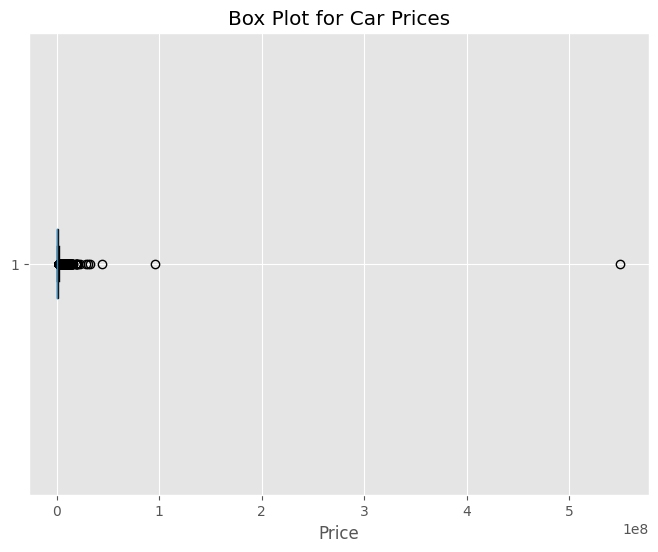

In [ ]:
# Visualize the distribution using a box plot
plt.figure(figsize=(8, 6))
plt.boxplot(df['Price'], vert=False, patch_artist=True)
plt.title('Box Plot for Car Prices')
plt.xlabel('Price')
plt.show()

# Q2: What is the number of the outliers?

In [ ]:
# Calculate IQR
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (df['Price'] < lower_bound) | (df['Price'] > upper_bound)

# Count the number of outliers
num_outliers = outliers.sum()

print(f"Number of outliers: {num_outliers}")

Number of outliers: 2834


## Remove the Outliers

In [ ]:
# Remove the outliers from the dataset
df = df[~outliers]

# Q3: How is the distribution of car prices after removing the outliers?

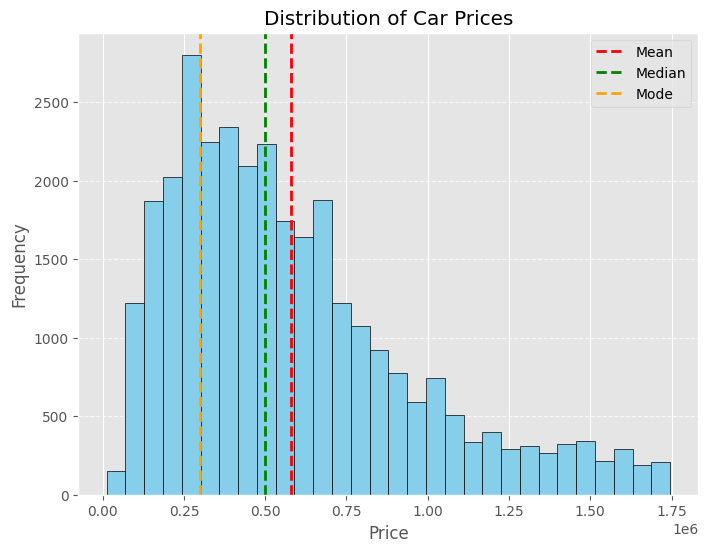

In [ ]:
# Visualize the distribution after removing outliers
plt.figure(figsize=(8, 6))
plt.hist(df['Price'], bins=30, color='skyblue', edgecolor='black')

# Add lines for mean, median, mode
plt.axvline(df['Price'].mean(), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(df['Price'].median(), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(df['Price'].mode().iloc[0], color='orange', linestyle='dashed', linewidth=2, label='Mode')

plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Q4: How do the total sales values vary by car body type?

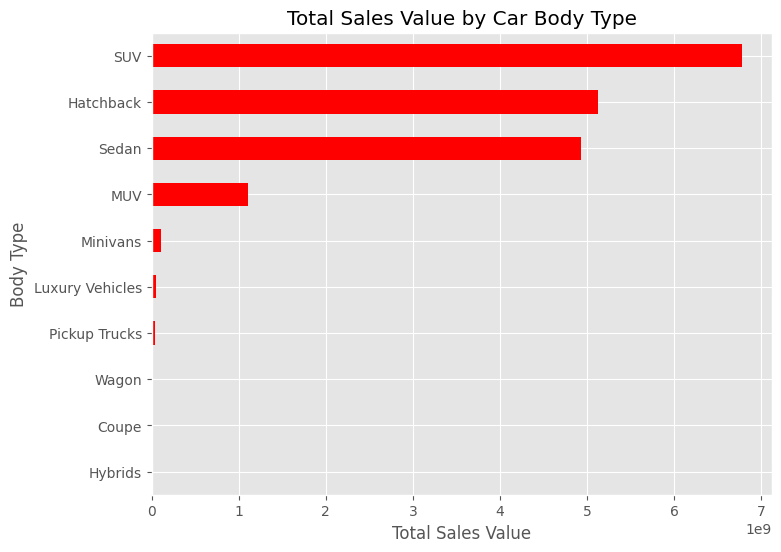

In [ ]:
# Visualize the total sales value by car body type
plt.figure(figsize=(8, 6))
body_sales = df.groupby('Body')['Price'].sum()
body_sales = body_sales.sort_values(ascending=True)
body_sales.plot(kind='barh', color='red')
plt.title('Total Sales Value by Car Body Type')
plt.xlabel('Total Sales Value')
plt.ylabel('Body Type')
plt.show()

# Q5: What are the top 10 brands by average car price?

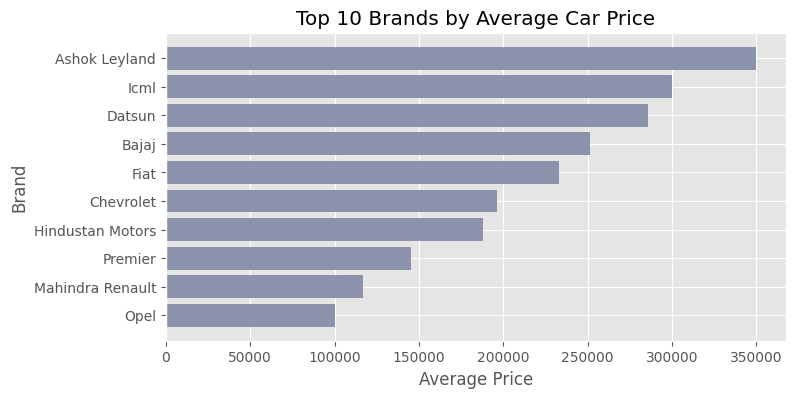

In [ ]:
# Visualize the average car prices for the top 10 brands
plt.figure(figsize=(8, 4))
brand_avg_price = df.groupby('Brand')['Price'].mean()
top_10_brands = brand_avg_price.sort_values(ascending=True).head(10)
plt.barh(top_10_brands.index, top_10_brands, color='#8c92ac')
plt.title('Top 10 Brands by Average Car Price')
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.show()

# Q6: What are the top 10 colors by average car price?

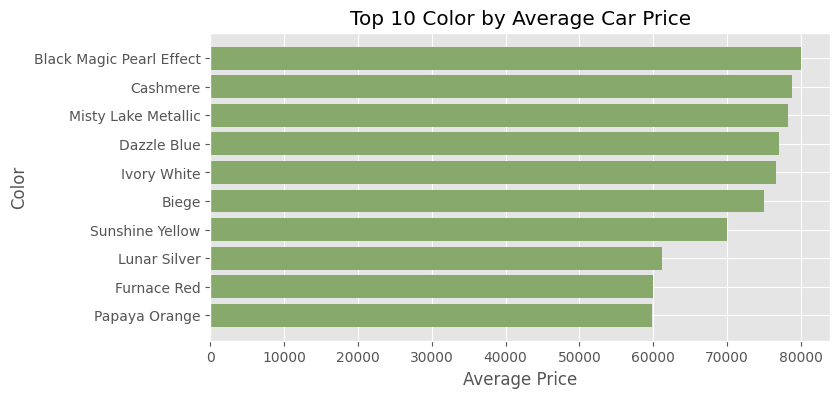

In [ ]:
# Visualize the average car prices for the top 10 colors
plt.figure(figsize=(8, 4))
brand_avg_price = df.groupby('Color')['Price'].mean()
top_10_colors = brand_avg_price.sort_values(ascending=True).head(10)
plt.barh(top_10_colors.index, top_10_colors, color='#87a96b')
plt.title('Top 10 Color by Average Car Price')
plt.xlabel('Average Price')
plt.ylabel('Color')
plt.show()

# Q7: What is the distribution of car transmissions in the dataset?

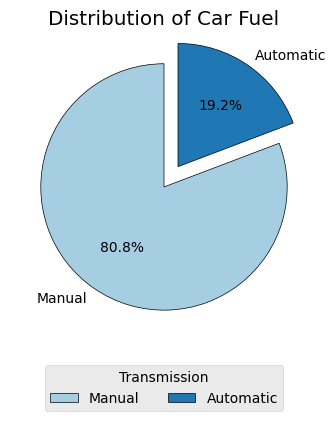

In [ ]:
# Visualize the distribution of car transmissions
plt.figure(figsize=(4, 4))
color_distribution = df['Transmission'].value_counts()
plt.pie(color_distribution, labels=color_distribution.index, autopct='%1.1f%%',
        explode=[0,0.2] , startangle=90, wedgeprops={'edgecolor':'k'}, colors=plt.cm.Paired.colors)
plt.title('Distribution of Car Fuel')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), title='Transmission', ncol=len(color_distribution))
plt.show()

# Q8: What is the average cargo volume by car body type?

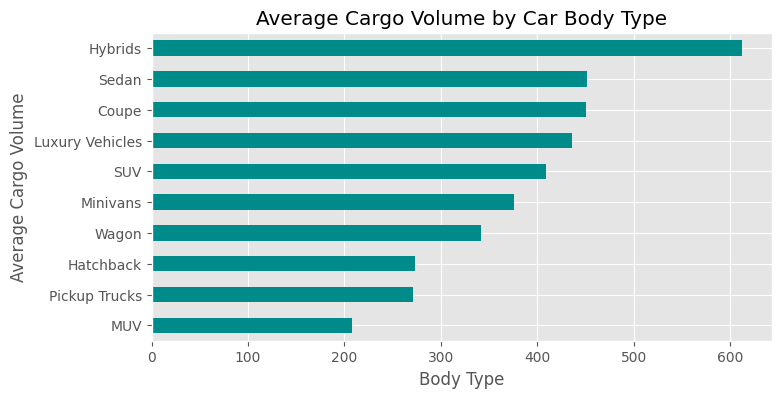

In [ ]:
# Visualize the average cargo volume by car body type
plt.figure(figsize=(8, 4))
body_avg_cargo = df.groupby('Body')['Cargo Volume'].mean()
body_avg_cargo = body_avg_cargo.sort_values(ascending=True)
body_avg_cargo.plot(kind='barh', color='#008b8b')
plt.title('Average Cargo Volume by Car Body Type')
plt.xlabel('Body Type')
plt.ylabel('Average Cargo Volume')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Make a function to display a count plot chart with data labels
def plot_countplot_with_labels(x, hue, data):
    """
    Plot a countplot with data labels for each bar.

    Parameters:
    - x: str
        The feature to be plotted on the x-axis.
    - hue: str
        The feature to be used for color differentiation (e.g., 'Transmission').
    - data: DataFrame
        The DataFrame containing the data to be plotted.

    Returns:
    Display thr Count Plot with data labels
    """
    plt.figure(figsize=(12, 6))
    ax = sns.countplot(x=x, hue=hue, data=data)
    plt.xlabel(f'{x} Type')
    plt.ylabel('Count')

    # Show data labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.title(f'Transmission Distribution by {x} Type')
    plt.show()

# Q9: How is the distribution of car transmissions based on body type?

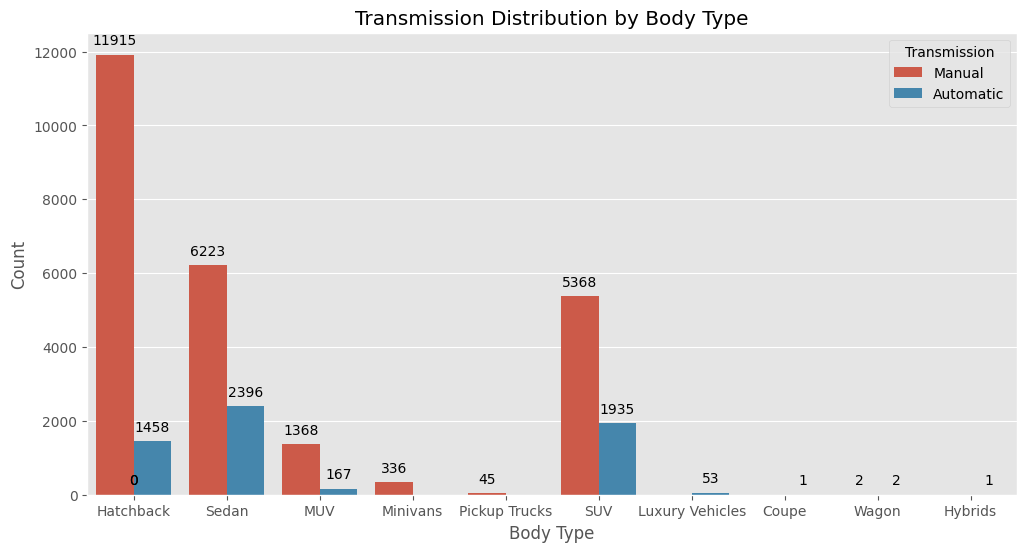

In [ ]:
# Plot a countplot with data labels for Transmission distribution by Body Type
plot_countplot_with_labels(x='Body', hue='Transmission', data=df)

# Q10: How is the distribution of car transmissions based on fuel type?

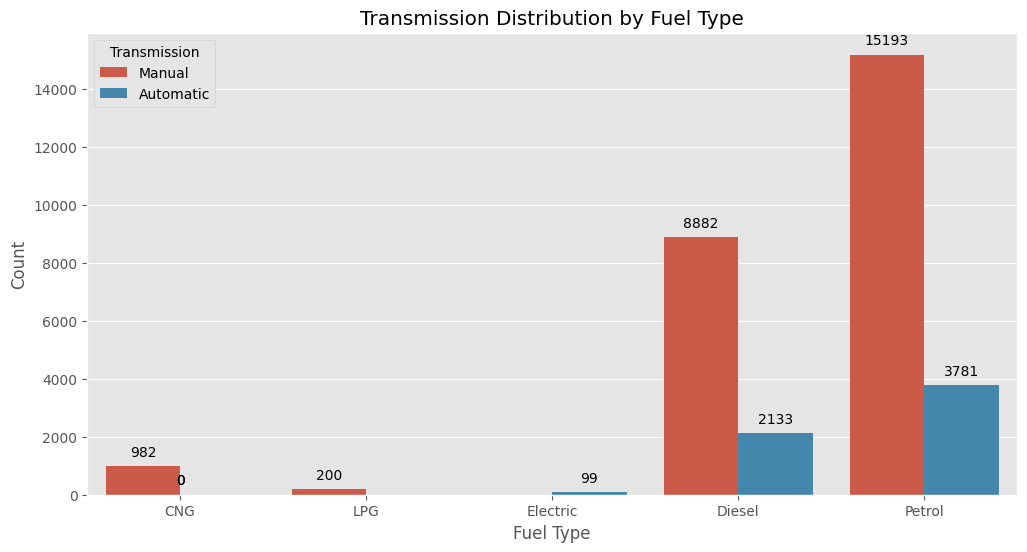

In [ ]:
# Plot a countplot with data labels for Transmission distribution by Fuel Type
plot_countplot_with_labels(x='Fuel', hue='Transmission', data=df)

# Q11: What is the correlation between numerical features?

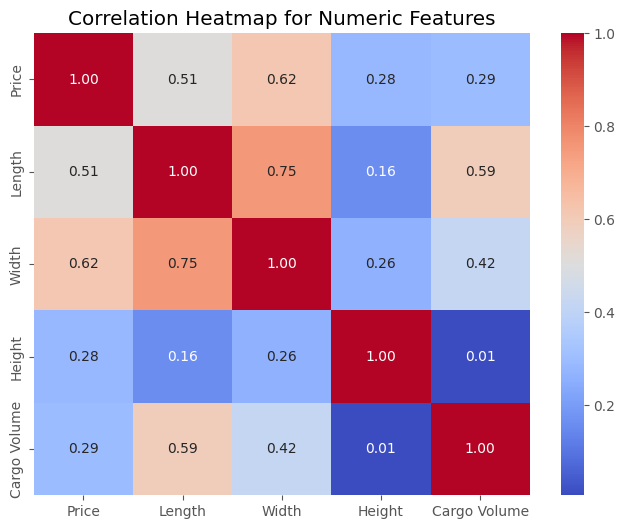

In [ ]:
# Correlation heatmap for some numerical features
plt.figure(figsize=(8, 6))
correlation_matrix = df[['Price', 'Length', 'Width', 'Height', 'Cargo Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numeric Features')
plt.show()

# Q12: How are the selected numerical features related to each other?

<Figure size 800x600 with 0 Axes>

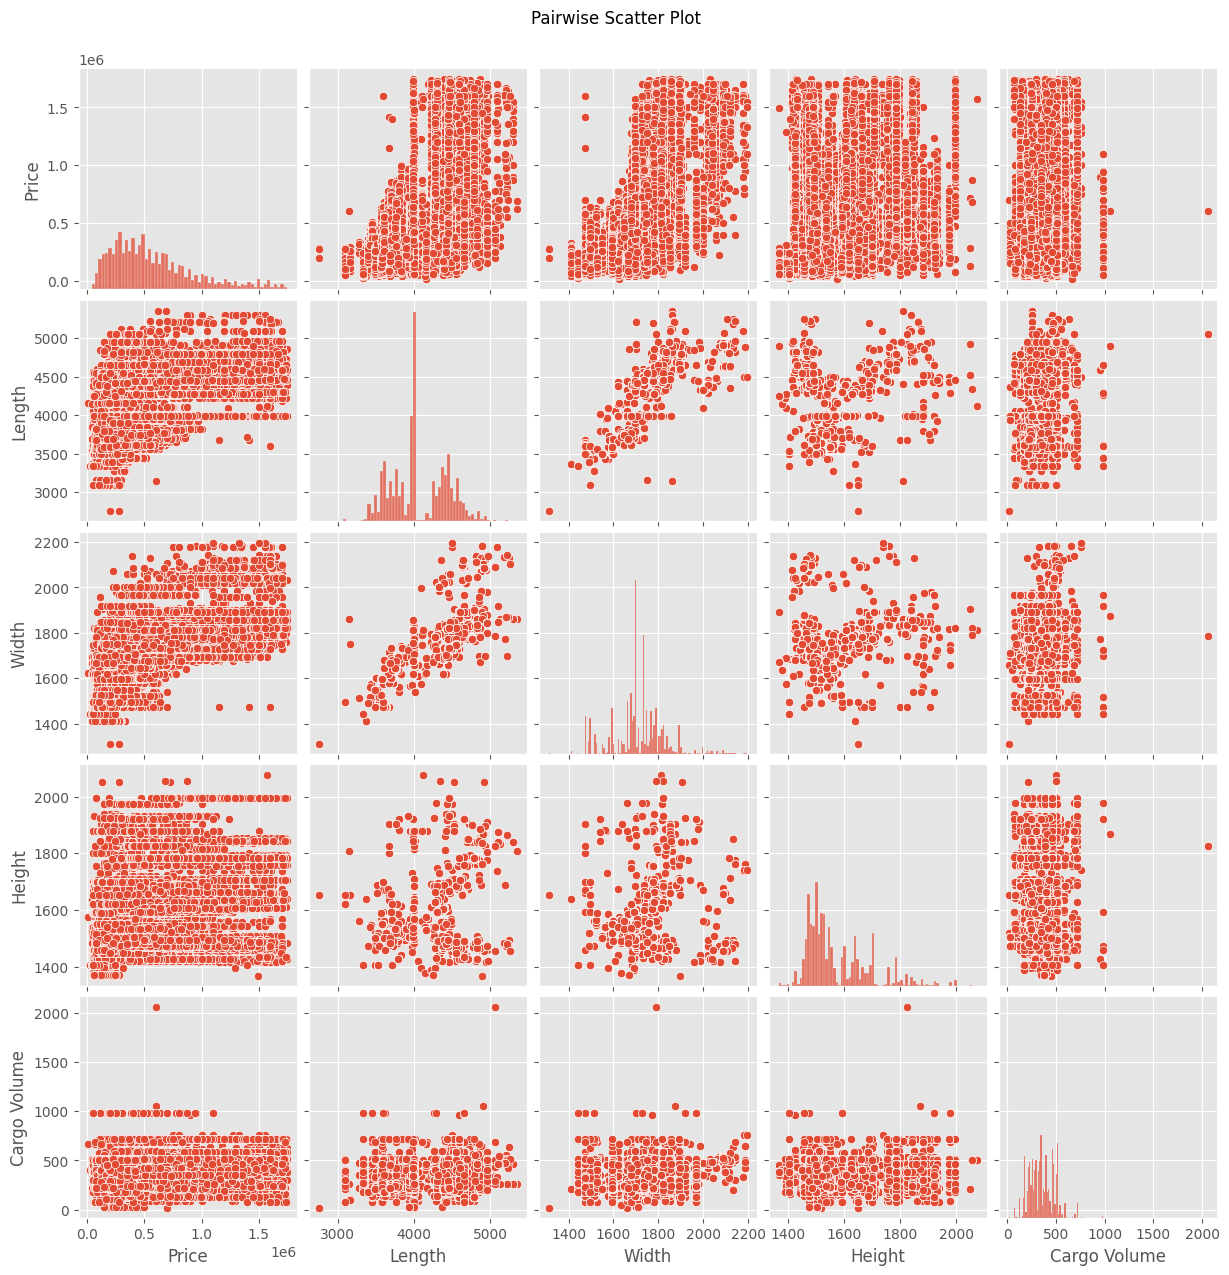

In [ ]:
# Pairwise scatter plot for selected numerical features
plt.figure(figsize=(8, 6))
sns.pairplot(df[['Price', 'Length', 'Width', 'Height', 'Cargo Volume']])
plt.suptitle('Pairwise Scatter Plot', y=1.02)
plt.show()

# Applying Machine Learning
## Data Preprocessing

In [ ]:
# Convert 'Seats' column to integer type
df['Seats'] = df['Seats'].astype(int)

# Select the suitable features for the model
X = df.drop(['Body', 'Brand', 'Model', 'Color', 'Price'], axis=1)
y = df['Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Columns to be label encoded
columns_to_label_encode = ['Transmission', 'Fuel', 'Gear Box']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the selected columns for both training and testing sets
for column in columns_to_label_encode:
    # Fit on the combined set to ensure consistent encoding across train and test
    label_encoder.fit(pd.concat([X_train[column], X_test[column]], axis=0))

    # Transform the values in both training and testing sets
    X_train[column + '_encoded'] = label_encoder.transform(X_train[column])
    X_test[column + '_encoded'] = label_encoder.transform(X_test[column])

# Drop the original categorical columns
X_train = X_train.drop(columns=columns_to_label_encode)
X_test = X_test.drop(columns=columns_to_label_encode)

## Training and Evaluating Different Models

In [ ]:
# List of models to try
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Gradient Boosting', GradientBoostingRegressor()),
    ('Support Vector Machines', SVR()),
    ('K-Nearest Neighbors', KNeighborsRegressor())
]

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name}: Mean Squared Error = {mse}, R-squared = {r2}')

Linear Regression: Mean Squared Error = 66079365278.32357, R-squared = 0.5117256678651931
Ridge Regression: Mean Squared Error = 66079255193.36525, R-squared = 0.5117264813061104
Decision Tree: Mean Squared Error = 22453576703.00864, R-squared = 0.8340857978504883
Random Forest: Mean Squared Error = 20572990458.147236, R-squared = 0.8479818452605082
Gradient Boosting: Mean Squared Error = 34629277304.89281, R-squared = 0.7441169845209729
Support Vector Machines: Mean Squared Error = 141515299105.3704, R-squared = -0.04568631775582288
K-Nearest Neighbors: Mean Squared Error = 26915010519.983913, R-squared = 0.801119324759049


We found that Random Forest has the better performance amogst the all models so we will tune it then use it for the prediction.

# Hyperparameter Tuning for Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor
rf_model_tuned = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rf_model_tuned, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Retrain the model with the best parameters
rf_model_best = RandomForestRegressor(**best_params, random_state=42)
rf_model_best.fit(X_train, y_train)

# Predict using the updated features
y_pred_best = rf_model_best.predict(X_test)

## The optimal hyperparameters for the Random Forest model after tuning

In [ ]:
# Evaluate the tuned Random Forest model
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f'Best Parameters: {best_params}')
print(f'Mean Squared Error (Tuned Random Forest): {mse_best}')
print(f'R-squared (Tuned Random Forest): {r2_best}')

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Mean Squared Error (Tuned Random Forest): 19998675641.13784
R-squared (Tuned Random Forest): 0.8522255782704918


## How well do the predicted prices align with the actual prices?

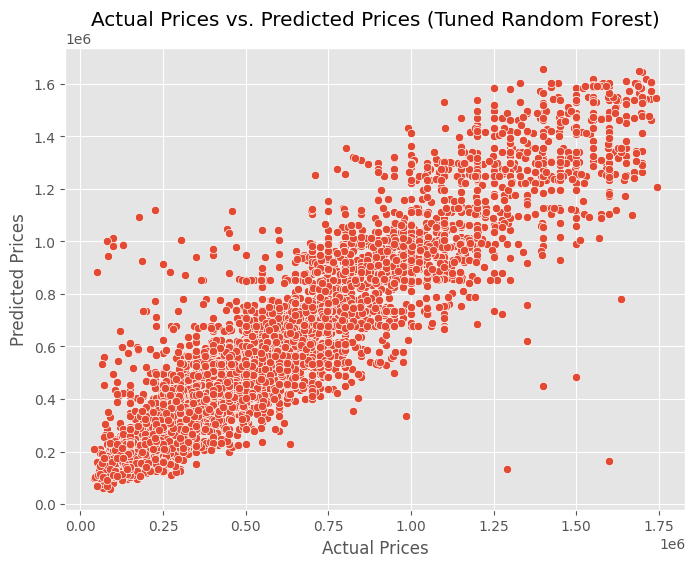

In [ ]:
# Visualize the predicted prices against the actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best)
plt.title('Actual Prices vs. Predicted Prices (Tuned Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

## What is the pattern of residuals in the model predictions?

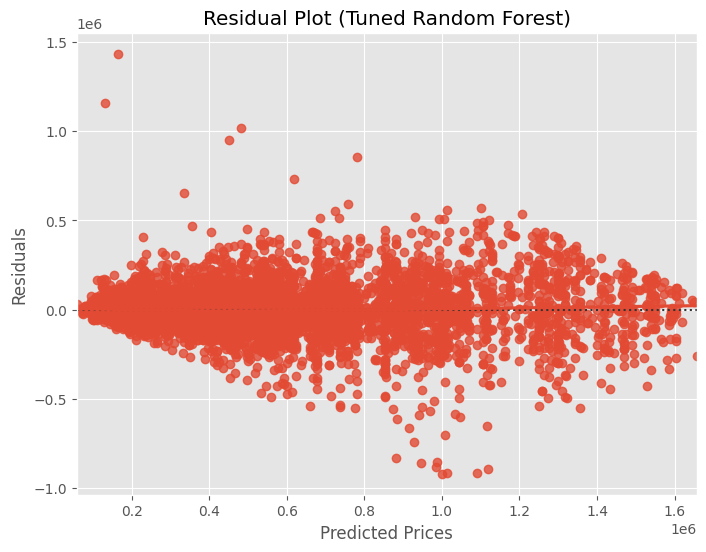

In [ ]:
# Visualize the residual plot for the tuned random forest
plt.figure(figsize=(8, 6))
sns.residplot(x=y_pred_best, y=y_test, lowess=True)
plt.title('Residual Plot (Tuned Random Forest)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.show()

## Which features have the most significant impact on predicting car prices in the tuned Random Forest model?

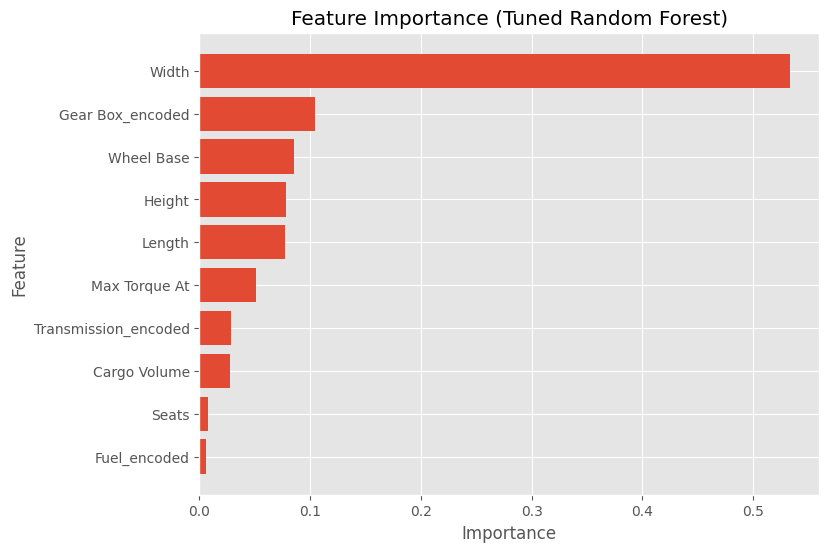

In [ ]:
# Visualize the features of the tuned random forest
feature_importances = rf_model_best.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_idx = feature_importances.argsort()

plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.title('Feature Importance (Tuned Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
import joblib

# Save the trained model using joblib
joblib.dump(rf_model_best, 'rf_model_best.pkl')

['rf_model_best.pkl']

In [ ]:
# Load the pre-trained model
rf_model_best = joblib.load('rf_model_best.pkl')

# Generating New Data and Predicting the Prices

In [ ]:
# Create a dictionary with synthetic data
new_data = {
    'Length': [3765.0, 3840.0, 3675.0, 3445.0, 3940.0],
    'Width': [1660.0, 1735.0, 1475.0, 1515.0, 1710.0],
    'Height': [1520.0, 1530.0, 1825.0, 1475.0, 1505.0],
    'Wheel Base': [2420.0, 2650.0, 2330.0, 2400.0, 3000.0],
    'Seats': [2, 7, 5, 11, 4],
    'Cargo Volume': [350.0, 150.0, 200.0, 420.0, 170.0],
    'Max Torque At': [2560.0, 2004.0, 2100.0, 3500.0, 2950.0],
    'Transmission_encoded': [1, 0, 0, 1, 1],
    'Fuel_encoded': [4, 1, 3, 5, 2],
    'Gear Box_encoded': [7, 2, 5, 1, 3],
}

# Create a DataFrame with the synthetic data
new_df = pd.DataFrame(new_data)

In [ ]:
# Predict prices for the new data
new_predictions = rf_model_best.predict(new_df)
print("Predicted Prices for the New Data:")
print(new_predictions)

Predicted Prices for the New Data:
[316021.40813495 686416.85316516 450757.12903444 190990.29427927
 484148.14752836]


In [ ]:
new_df['Predicted Price'] = new_predictions
new_df

,Length,Width,Height,Wheel Base,Seats,Cargo Volume,Max Torque At,Transmission_encoded,Fuel_encoded,Gear Box_encoded,Predicted Price
0,3765.0,1660.0,1520.0,2420.0,2,350.0,2560.0,1,4,7,316021.408135
1,3840.0,1735.0,1530.0,2650.0,7,150.0,2004.0,0,1,2,686416.853165
2,3675.0,1475.0,1825.0,2330.0,5,200.0,2100.0,0,3,5,450757.129034
3,3445.0,1515.0,1475.0,2400.0,11,420.0,3500.0,1,5,1,190990.294279
4,3940.0,1710.0,1505.0,3000.0,4,170.0,2950.0,1,2,3,484148.147528


# Dynamic Dashboard for Predciting Car Prices

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output

# Function to handle button click event
def on_predict_button_click(b):
    # Get the input values from the sliders
    input_values = {
        'Length': length_slider.value,
        'Width': width_slider.value,
        'Height': height_slider.value,
        'Wheel Base': wheel_base_slider.value,
        'Seats': seats_slider.value,
        'Cargo Volume': cargo_volume_slider.value,
        'Max Torque At': max_torque_slider.value,
        'Transmission_encoded': transmission_dropdown.value,
        'Fuel_encoded': fuel_dropdown.value,
        'Gear Box_encoded': gear_box_dropdown.value
    }

    # Create a DataFrame with the input data
    input_df = pd.DataFrame([input_values])

    # Predict prices for the input data
    predicted_price = rf_model_best.predict(input_df)[0]

    # Display the predicted price
    with output:
        clear_output(wait=True)
        print(f'Predicted Price: {predicted_price}')

# Create sliders for each feature
length_slider = widgets.FloatSlider(description='Length', min=3000, max=5000, value=4000)
width_slider = widgets.FloatSlider(description='Width', min=1200, max=2000, value=1600)
height_slider = widgets.FloatSlider(description='Height', min=1200, max=2000, value=1600)
wheel_base_slider = widgets.FloatSlider(description='Wheel Base', min=2000, max=4000, value=3000)
seats_slider = widgets.IntSlider(description='Seats', min=2, max=10, value=5)
cargo_volume_slider = widgets.FloatSlider(description='Cargo Volume', min=0, max=500, value=250)
max_torque_slider = widgets.FloatSlider(description='Max Torque At', min=1000, max=4000, value=2000)

# Create dropdowns for categorical features
transmission_dropdown = widgets.Dropdown(description='Transmission', options=[0, 1], value=1)
fuel_dropdown = widgets.Dropdown(description='Fuel', options=[1, 2, 3, 4, 5], value=4)
gear_box_dropdown = widgets.Dropdown(description='Gear Box', options=[1, 2, 3, 5, 7], value=7)

# Create a button for prediction
predict_button = widgets.Button(description='Predict', style={'button_color': '#97a12c'})
predict_button.on_click(on_predict_button_click)

# Create an output widget to display results
output = widgets.Output()

# Display the widgets
display(length_slider, width_slider, height_slider, wheel_base_slider, seats_slider,
        cargo_volume_slider, max_torque_slider, transmission_dropdown, fuel_dropdown,
        gear_box_dropdown, predict_button, output)

FloatSlider(value=4000.0, description='Length', max=5000.0, min=3000.0)

FloatSlider(value=1600.0, description='Width', max=2000.0, min=1200.0)

FloatSlider(value=1600.0, description='Height', max=2000.0, min=1200.0)

FloatSlider(value=3000.0, description='Wheel Base', max=4000.0, min=2000.0)

IntSlider(value=5, description='Seats', max=10, min=2)

FloatSlider(value=250.0, description='Cargo Volume', max=500.0)

FloatSlider(value=2000.0, description='Max Torque At', max=4000.0, min=1000.0)

Dropdown(description='Transmission', index=1, options=(0, 1), value=1)

Dropdown(description='Fuel', index=3, options=(1, 2, 3, 4, 5), value=4)

Dropdown(description='Gear Box', index=4, options=(1, 2, 3, 5, 7), value=7)

Button(description='Predict', style=ButtonStyle(button_color='#97a12c'))

Output()

# Conclusion

Throughout this analysis, we've dived deep into the dataset, unraveling valuable insights into the factors influencing car prices. Thank you for joining us on this data exploration journey. We hope you gained valuable insights and inspiration for future data science projects!

# Made by: `Data Pioneers` Team 👨‍💻